In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv(r'F:\Learn_ai_ml_da\Quora\Raw_data/train.csv')

In [36]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


In [ ]:
#### Checking for NULL values 

In [37]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [38]:
# Filling the null values with ' '
df.fillna('',inplace=True)

In [39]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

### Aftter doing some high level basic statistics lets do some basic Feature Engineering on data...
    Basic Feature Extraction (before cleaning) 

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's(number of times question 1 occurs)
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1 (string length of q1)
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 
  (if we have more common words , then there is a higher likelihood that both que. will be common..)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total) 
 
    u can think it as word_common=intersection & word_Total=union 
    (|Q1#Q2|/|Q1|+|Q2|) where #=intersection & Q1 & Q2 are sets & this is basicallly set representation...
    
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [40]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [41]:
df.head(20)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [42]:
df['qid1']

0              1
1              3
2              5
3              7
4              9
           ...  
404285    433578
404286     18840
404287    537928
404288    537930
404289    537932
Name: qid1, Length: 404290, dtype: int64

In [43]:
data=df.copy()

### Frequency of qid's(let say number of times question 1 occurs)

In [44]:
data['qid1']

0              1
1              3
2              5
3              7
4              9
           ...  
404285    433578
404286     18840
404287    537928
404288    537930
404289    537932
Name: qid1, Length: 404290, dtype: int64

In [45]:
data['freq_qid1']=data.groupby('qid1')['qid1'].transform('count')

In [46]:
data['qid2']

0              2
1              4
2              6
3              8
4             10
           ...  
404285    379845
404286    155606
404287    537929
404288    537931
404289    537933
Name: qid2, Length: 404290, dtype: int64

In [47]:
data['freq_qid2']=data.groupby('qid2')['qid2'].transform('count')

In [48]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2'],
      dtype='object')

In [49]:
data.head(4)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1


### Length of q1 & q2

In [50]:
data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [51]:
len(data['question1'][0])

## ie 66 characters in question1 of 0th index

66

In [52]:
type(data['question1'])

pandas.core.series.Series

In [53]:
data['q1len']=data['question1'].str.len()

In [54]:
data['q2len']=data['question2'].str.len()

In [55]:
data.head(4)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65


### number of words in question 1 & question 2

In [56]:
data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [57]:
len(data['question1'][0].split(' '))

14

In [58]:
def count_length_of_text(text):
    return len(text.split(' '))

In [59]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59


In [60]:
data['q1_n_words']=data['question1'].apply(count_length_of_text)

In [61]:
data['q2_n_words']=data['question2'].apply(count_length_of_text)

In [62]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10


### create words_common feature..

In [63]:
data['question1'][0]

'What is the step by step guide to invest in share market in india?'

In [64]:
data['question2'][0]

'What is the step by step guide to invest in share market?'

In [65]:
data['question1'][0].split(' ')

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india?']

In [66]:
def lower_case(word):
    return word.lower()

In [67]:
'Shan'.lower()

'shan'

In [68]:
list1=data['question1'][0].split(' ')

In [69]:
print(list1)

['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india?']


In [72]:
w1=set(map(lower_case,list1))

In [77]:
w1

{'by',
 'guide',
 'in',
 'india?',
 'invest',
 'is',
 'market',
 'share',
 'step',
 'the',
 'to',
 'what'}

In [73]:
list2=data['question2'][0].split(' ')

In [74]:
print(list2)

['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market?']


In [75]:
w2=set(map(lower_case,list2))

In [76]:
w2

{'by',
 'guide',
 'in',
 'invest',
 'is',
 'market?',
 'share',
 'step',
 'the',
 'to',
 'what'}

In [78]:
w1 & w2

{'by', 'guide', 'in', 'invest', 'is', 'share', 'step', 'the', 'to', 'what'}

In [79]:
len(w1 & w2)

10

In [80]:
def word_common(row):
    list1=row['question1'].split(' ')
    list2=row['question2'].split(' ')
    
    w1=set(map(lower_case,list1))
    w2=set(map(lower_case,list2))
    return len(w1 & w2)

In [82]:
data['word_common']=data.apply(word_common,axis=1)

In [83]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4


### create word_Total feature

In [84]:
def word_Total(row):
    list1=row['question1'].split(' ')
    list2=row['question2'].split(' ')
    
    w1=set(map(lower_case,list1))
    w2=set(map(lower_case,list2))
    return (len(w1) + len(w2))

In [85]:
data['word_Total']=data.apply(word_Total,axis=1)

In [86]:
data['word_Total']

0         23
1         20
2         24
3         19
4         20
          ..
404285    25
404286    16
404287     7
404288    40
404289    18
Name: word_Total, Length: 404290, dtype: int64

### Create word_share feature which is => word_common (ie intersection) / (word_Total)

In [87]:
def word_share(row):
    list1=row['question1'].split(' ')
    list2=row['question2'].split(' ')
    
    w1=set(map(lower_case,list1))
    w2=set(map(lower_case,list2))
    return len(w1 & w2)/(len(w1)+len(w2))
    

In [89]:
data['word_share']=data.apply(word_share,axis=1)

In [90]:
data.head(6)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,1,1,86,90,16,16,8,31,0.258065


In [91]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'word_Total', 'word_share'],
      dtype='object')

### Create (freq_q1+freq_q2) & (freq_q1-freq_q2)

In [94]:
data['freq_q1+q2']=data['freq_qid1'] + data['freq_qid2']

In [95]:
data['freq_q1-q2']=abs(data['freq_qid1'] - data['freq_qid2'])

In [96]:
data.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0


In [97]:
data.shape

(404290, 17)

In [98]:
### lets store data at some location..
data.to_csv(r'F:\Learn_ai_ml_da\Quora\Basic_fe/data_feature_extraction.csv',index=False)

### Basic Analysis of some of the extracted features

In [99]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2


In [101]:
print('Min length of the questions in question1 : {} .'.format(data['q1_n_words'].min()))

Min length of the questions in question1 : 1 .


In [102]:
print('Min length of the questions in question2 : {} .'.format(data['q2_n_words'].min()))

Min length of the questions in question2 : 1 .


In [105]:
len(data[data['q1_n_words']==1])

67

In [106]:
len(data[data['q2_n_words']==1])

24

#### Analysing distribution of length of each questions

(array([1.000e+00, 1.900e+01, 8.000e+00, 6.000e+00, 1.000e+01, 1.100e+01,
        2.000e+00, 1.100e+01, 7.000e+00, 7.000e+00, 1.300e+01, 3.600e+01,
        1.140e+02, 1.980e+02, 2.710e+02, 3.330e+02, 5.050e+02, 6.740e+02,
        8.720e+02, 1.177e+03, 1.412e+03, 1.743e+03, 1.993e+03, 2.313e+03,
        2.731e+03, 3.009e+03, 3.637e+03, 3.938e+03, 4.462e+03, 4.676e+03,
        5.356e+03, 5.628e+03, 6.259e+03, 6.604e+03, 6.638e+03, 7.070e+03,
        7.245e+03, 7.909e+03, 8.171e+03, 8.023e+03, 8.008e+03, 8.109e+03,
        8.428e+03, 8.330e+03, 8.517e+03, 8.550e+03, 8.065e+03, 8.172e+03,
        7.952e+03, 7.900e+03, 7.682e+03, 7.310e+03, 7.025e+03, 7.141e+03,
        6.786e+03, 6.167e+03, 6.139e+03, 6.114e+03, 5.631e+03, 5.572e+03,
        5.424e+03, 5.107e+03, 4.840e+03, 4.744e+03, 4.427e+03, 4.313e+03,
        4.077e+03, 4.137e+03, 3.835e+03, 3.615e+03, 3.707e+03, 3.512e+03,
        3.220e+03, 3.186e+03, 3.222e+03, 2.836e+03, 2.883e+03, 2.863e+03,
        2.834e+03, 2.732e+03, 2.449e+0

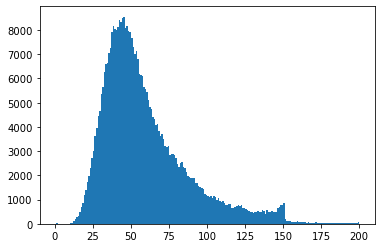

In [111]:
plt.hist(data['q1len'],range=[0,200],bins=200)

#### Analysing distribution of numbers of words in each questions

(array([0.0000e+00, 6.7000e+01, 7.3000e+01, 3.3310e+03, 9.7340e+03,
        1.8753e+04, 3.0940e+04, 4.3053e+04, 4.7606e+04, 4.5469e+04,
        3.9478e+04, 3.0019e+04, 2.4381e+04, 1.8889e+04, 1.6478e+04,
        1.3424e+04, 1.0880e+04, 8.3860e+03, 6.7990e+03, 5.7580e+03,
        5.0360e+03, 4.2730e+03, 3.7360e+03, 2.9130e+03, 2.6150e+03,
        2.2490e+03, 2.0640e+03, 1.6420e+03, 1.4440e+03, 1.0180e+03,
        8.0600e+02, 5.4300e+02, 4.1800e+02, 3.1000e+02, 2.3300e+02,
        1.8900e+02, 1.4100e+02, 1.4700e+02, 1.2500e+02, 1.0300e+02,
        9.2000e+01, 7.1000e+01, 8.5000e+01, 7.1000e+01, 3.7000e+01,
        5.2000e+01, 4.1000e+01, 2.9000e+01, 2.8000e+01, 7.1000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 a

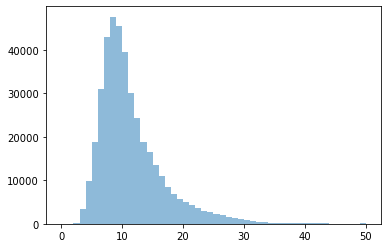

In [114]:
plt.hist(data['q1_n_words'],range=[0,50],bins=50,alpha=0.5)

#### Analysing distribution of Feature: word_share¶

In [117]:
data['word_share']

0         0.434783
1         0.200000
2         0.166667
3         0.000000
4         0.100000
            ...   
404285    0.440000
404286    0.312500
404287    0.142857
404288    0.025000
404289    0.444444
Name: word_share, Length: 404290, dtype: float64

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_share', ylabel='Density'>

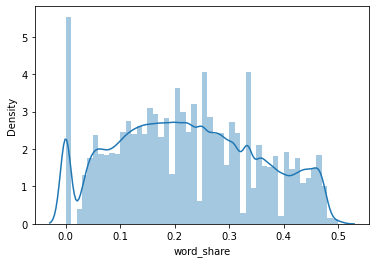

In [118]:
sns.distplot(data['word_share'])

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_share', ylabel='Density'>

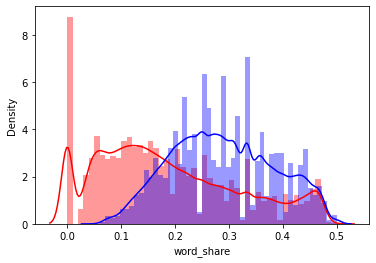

In [126]:
sns.distplot(data[data['is_duplicate']==0]['word_share'],color='red')
sns.distplot(data[data['is_duplicate']==1]['word_share'],color='blue')

<AxesSubplot:xlabel='is_duplicate', ylabel='word_share'>

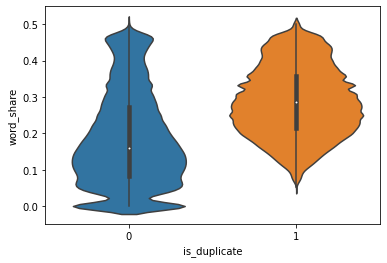

In [127]:
sns.violinplot(x='is_duplicate',y='word_share',data=data)

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_share', ylabel='Density'>

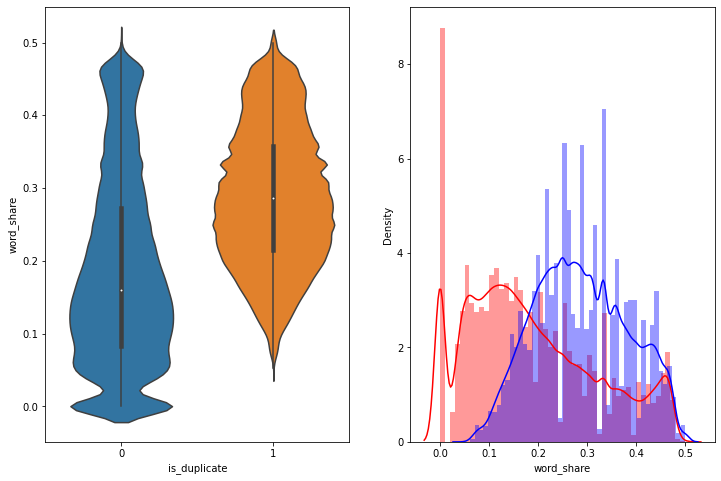

In [129]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=data)

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==0]['word_share'],color='red')
sns.distplot(data[data['is_duplicate']==1]['word_share'],color='blue')

#### Analysing distribution of Feature: word_common

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_common', ylabel='Density'>

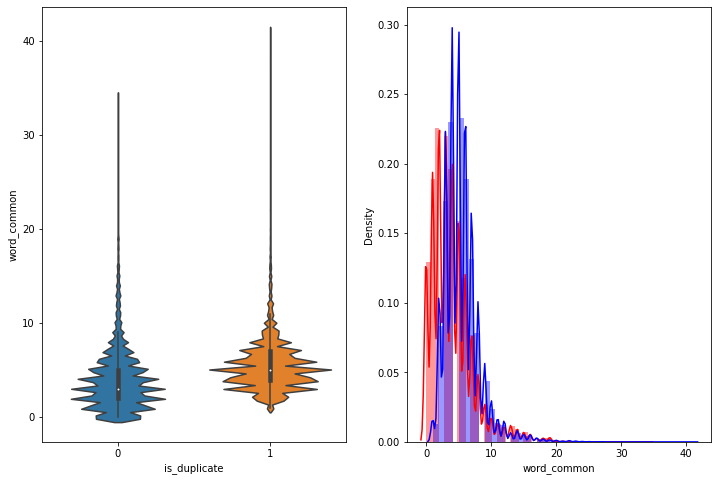

In [130]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_common',data=data)

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate']==0]['word_common'],color='red')
sns.distplot(data[data['is_duplicate']==1]['word_common'],color='blue')